<a href="https://colab.research.google.com/github/Akshat30/cse151Aproject/blob/main/cse151Aproject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!git clone https://github.com/Akshat30/cse151Aproject

Cloning into 'cse151Aproject'...
remote: Enumerating objects: 10, done.
remote: Counting objects: 100% (10/10), done.
remote: Compressing objects: 100% (8/8), done.
remote: Total 10 (delta 2), reused 0 (delta 0), pack-reused 0
Receiving objects: 100% (10/10), 1.13 MiB | 6.06 MiB/s, done.
Resolving deltas: 100% (2/2), done.


   danceability  energy   key  loudness  mode  speechiness  acousticness  \
0         0.741   0.739  11.0    -4.627   0.0       0.0386      0.005410   
1         0.649   0.973   6.0    -4.391   1.0       0.0882      0.000639   
2         0.791   0.862   9.0    -3.240   0.0       0.1100      0.037000   
3         0.738   0.861   2.0    -4.141   1.0       0.2370      0.318000   
4         0.647   0.844   0.0    -3.756   1.0       0.0457      0.013700   

   instrumentalness  liveness  valence    tempo  duration_ms  time_signature  \
0          0.026900    0.0496    0.425  126.008     262857.0             4.0   
1          0.662000    0.1330    0.221  127.951     279375.0             4.0   
2          0.000022    0.0814    0.592  123.994     214847.0             4.0   
3          0.001820    0.3250    0.580  131.980     189052.0             4.0   
4          0.000658    0.1020    0.746  146.967     193829.0             4.0   

   popularity  
0          39  
1           0  
2          86 

<Axes: >

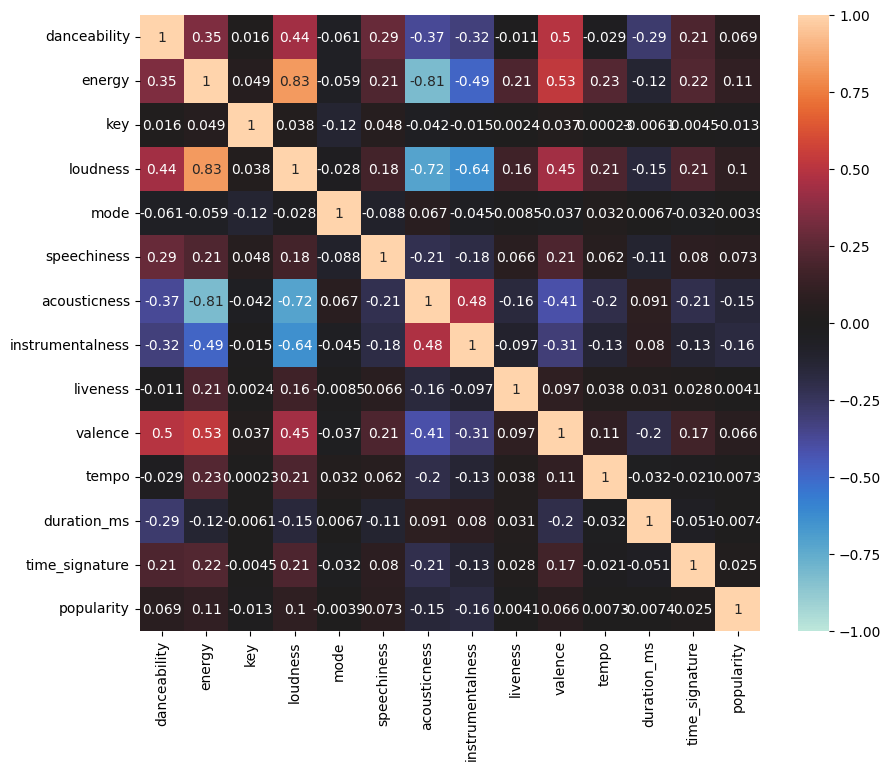

In [ ]:
import pandas as pd

import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

song_data = pd.read_csv("/content/cse151Aproject/spotifydata_withpopularity.csv")
song_data_numerical = song_data.drop(['entry', 'type', 'id', 'uri', 'track_href', 'analysis_url', 'song_name', 'artist', 'genre'], axis=1)
print(song_data_numerical.head())
song_data_corr = song_data_numerical.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(song_data_corr, vmin=-1, vmax=1, center=0, annot=True)

['danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo', 'duration_ms', 'time_signature', 'popularity']


<Axes: >

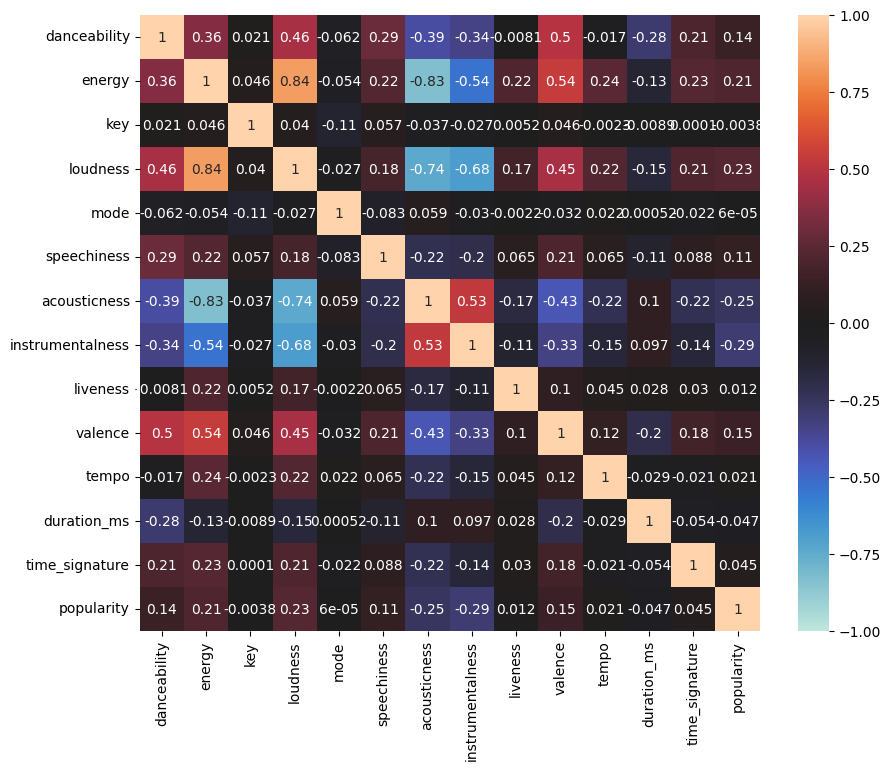

In [ ]:
filtered = song_data_numerical.loc[song_data_numerical['popularity'] != 0]
print(filtered.columns.tolist())
song_data_corr = filtered.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(song_data_corr, vmin=-1, vmax=1, center=0, annot=True)

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.impute import SimpleImputer

# Assuming song_data is your DataFrame and it's already loaded

song_data = filtered

# Define features (X) and target (y)
X = song_data.drop('popularity', axis=1)
y = song_data['popularity']

# Impute missing values
imputer = SimpleImputer(strategy='mean')
X_imputed = imputer.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_imputed, y, test_size=0.2, random_state=42)

# Initialize and train Linear Regression model
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

# Predictions
y_pred_linear = linear_model.predict(X_test)

# Initialize and train RandomForestRegressor model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Predictions
y_pred_rf = rf_model.predict(X_test)

# Evaluate the models
print("Linear Regression Performance:")
print("Mean Squared Error:", mean_squared_error(y_test, y_pred_linear))
print("R^2 Score:", r2_score(y_test, y_pred_linear))

print("\nRandom Forest Performance:")
print("Mean Squared Error:", mean_squared_error(y_test, y_pred_rf))
print("R^2 Score:", r2_score(y_test, y_pred_rf))


Linear Regression Performance:
Mean Squared Error: 488.3123773956479
R^2 Score: 0.09619452611967139

Random Forest Performance:
Mean Squared Error: 380.81102453080854
R^2 Score: 0.29516615916934896


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.metrics import mean_squared_error, r2_score
import tensorflow as tf
from tensorflow.keras import layers

# Assuming song_data is your DataFrame and it's already loaded

# Define features (X) and target (y)
X = song_data.drop('popularity', axis=1)
y = song_data['popularity']

# Impute missing values
imputer = SimpleImputer(strategy='mean')
X_imputed = imputer.fit_transform(X)

# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_imputed)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Neural network model
model = tf.keras.Sequential([
    layers.Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
    layers.Dense(64, activation='relu'),
    layers.Dense(32, activation='relu'),
    layers.Dense(1)
])

model.compile(optimizer='adam',
              loss='mean_squared_error')



In [ ]:
# Train the model
history = model.fit(X_train, y_train, epochs=100, validation_split=0.2, verbose=1)

Epoch 1/100
153/153 [==============================] - 3s 9ms/step - loss: 1113.4050 - val_loss: 508.2595
Epoch 2/100
153/153 [==============================] - 0s 3ms/step - loss: 501.6020 - val_loss: 496.2477
Epoch 3/100
153/153 [==============================] - 0s 3ms/step - loss: 487.0265 - val_loss: 490.3517
Epoch 4/100
153/153 [==============================] - 0s 3ms/step - loss: 479.7405 - val_loss: 498.4049
Epoch 5/100
153/153 [==============================] - 0s 3ms/step - loss: 475.9220 - val_loss: 494.5008
Epoch 6/100
153/153 [==============================] - 1s 3ms/step - loss: 471.3147 - val_loss: 491.8356
Epoch 7/100
153/153 [==============================] - 0s 3ms/step - loss: 469.4962 - val_loss: 490.5948
Epoch 8/100
153/153 [==============================] - 0s 3ms/step - loss: 466.8687 - val_loss: 497.4185
Epoch 9/100
153/153 [==============================] - 0s 3ms/step - loss: 466.6776 - val_loss: 490.9195
Epoch 10/100
153/153 [==============================] 

In [ ]:
# Predictions
y_pred_nn = model.predict(X_test)

# Evaluate the model
mse_nn = mean_squared_error(y_test, y_pred_nn)
r2_nn = r2_score(y_test, y_pred_nn)

print("Neural Network Performance:")
print("Mean Squared Error:", mse_nn)
print("R^2 Score:", r2_nn)

48/48 [==============================] - 0s 4ms/step
Neural Network Performance:
Mean Squared Error: 554.8965509968979
R^2 Score: -0.027044497424162595
